In [1]:
import numpy as np
import cvxpy as cvx
import matplotlib.pyplot as plt

In [2]:
n = 2000
t = np.arange(n).reshape(-1,1)
exact = np.vstack([np.ones([500,1]), -np.ones([500,1]), np.ones([500,1]), -np.ones([500,1])])

x = exact + 0.5*np.sin((2*np.pi/n)*t)
exact_variation = np.sum(np.abs(exact[1:n] - exact[0:n-1]))

noise = 0.1*np.random.randn(n,1)
corrupt = x + noise

In [3]:
n = 2000

D = np.zeros([n-1, n])
D[:, 0:n-1] -= np.eye(n-1)
D[:,1:n] += np.eye(n-1)

In [4]:
print(D)

[[-1.  1.  0. ...,  0.  0.  0.]
 [ 0. -1.  1. ...,  0.  0.  0.]
 [ 0.  0. -1. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ..., -1.  1.  0.]
 [ 0.  0.  0. ...,  0. -1.  1.]]


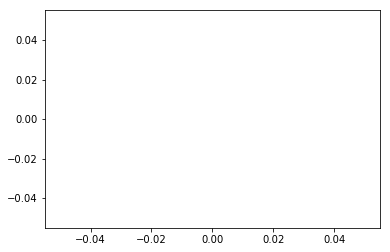

In [5]:
beta = 1.2

x = cvx.Variable(n, 1)
obj = cvx.Minimize(cvx.norm(x - corrupt, 2))
const = [cvx.norm( D*x,2) <= beta]
prob = cvx.Problem(obj, const).solve(solver = 'SCS')

x = x.value
plt.figure()
plt.plot()
plt.plot()
plt.show()

smooth line(red)이 orginal line(blue) beta가 작아질수록 gap이 생긴다 
- noise를 제거하거나 sharp change를 유지
- norm 1으로 변경

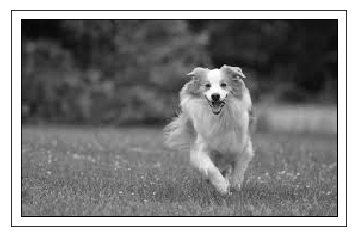

In [6]:
import scipy as sc # 이미지 처리를 위한 라이브러리

imbw = sc.misc.imread('./dog.png','L')
plt.imshow(imbw,'gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
row, col = imbw.shape
n = row * col

imbws = imbw.reshape(-1, 1)
imbws.shape

(81880, 1)

In [ ]:
beta = 50000

x = cvx.Variable(n)
obj = cvx.Minimize(cvx.norm(x-imbws,2))
const = [cvx.norm(x[1:n] - x[0:n-1],1) <= beta]
prob = cvx.Problem(obj, const).solve('SCS')

imbwr = x.value.reshape(row, col)

plt.imshow(imbwr,'gray')
plt.xticks([])
plt.yticks([])
plt.show()

## Classification